In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../Datasets/merged_alpha.csv')

In [3]:
df

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,KHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV03.0AH3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,KHNXV03.0AH3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV03.5PH3,small SUV,3,20,27,23,5,No,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,VOLVO XC90 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,RVVXJ02.0U70,standard SUV,5,22,27,24,5,No,369
14867,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393
14868,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393
14869,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0P30,standard SUV,7,26/59,27/57,27/58,9,Yes,137


In [4]:
df.describe()

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,13766.000000,13766.000000,14871.000000,14871.000000
mean,3.087629,5.560221,5.271535,5.088494
std,1.309898,1.857854,2.145538,2.175389
min,0.600000,2.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,4.000000
50%,3.000000,6.000000,5.000000,5.000000
75%,3.600000,6.000000,7.000000,6.000000
max,8.000000,16.000000,10.000000,10.000000


In [14]:
df.duplicated().sum()

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14871 entries, 0 to 14870
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 14871 non-null  object 
 1   Displ                 13766 non-null  float64
 2   Cyl                   13766 non-null  float64
 3   Trans                 14871 non-null  object 
 4   Drive                 14871 non-null  object 
 5   Fuel                  14871 non-null  object 
 6   Cert Region           14871 non-null  object 
 7   Stnd                  14871 non-null  object 
 8   Stnd Description      14871 non-null  object 
 9   Underhood ID          14871 non-null  object 
 10  Veh Class             14871 non-null  object 
 11  Air Pollution Score   14871 non-null  int64  
 12  City MPG              14871 non-null  object 
 13  Hwy MPG               14871 non-null  object 
 14  Cmb MPG               14871 non-null  object 
 15  Greenhouse Gas Scor

In [7]:
def split_values(value):
    split_values = value.split('/')
    return split_values[0]


df['City MPG'] = df['City MPG'].apply(split_values)
df['Hwy MPG']= df['Hwy MPG'].apply(split_values)
df['Cmb MPG']= df['Cmb MPG'].apply(split_values)
df['Comb CO2'] = df['Comb CO2'].apply(split_values)


In [8]:
df['City MPG'] = df['City MPG'].astype('float')

df['Hwy MPG'] = df['Hwy MPG'].astype('float')

df['Cmb MPG'] = df['Cmb MPG'].astype('float')

df['Comb CO2'] = df['Comb CO2'].astype('float')

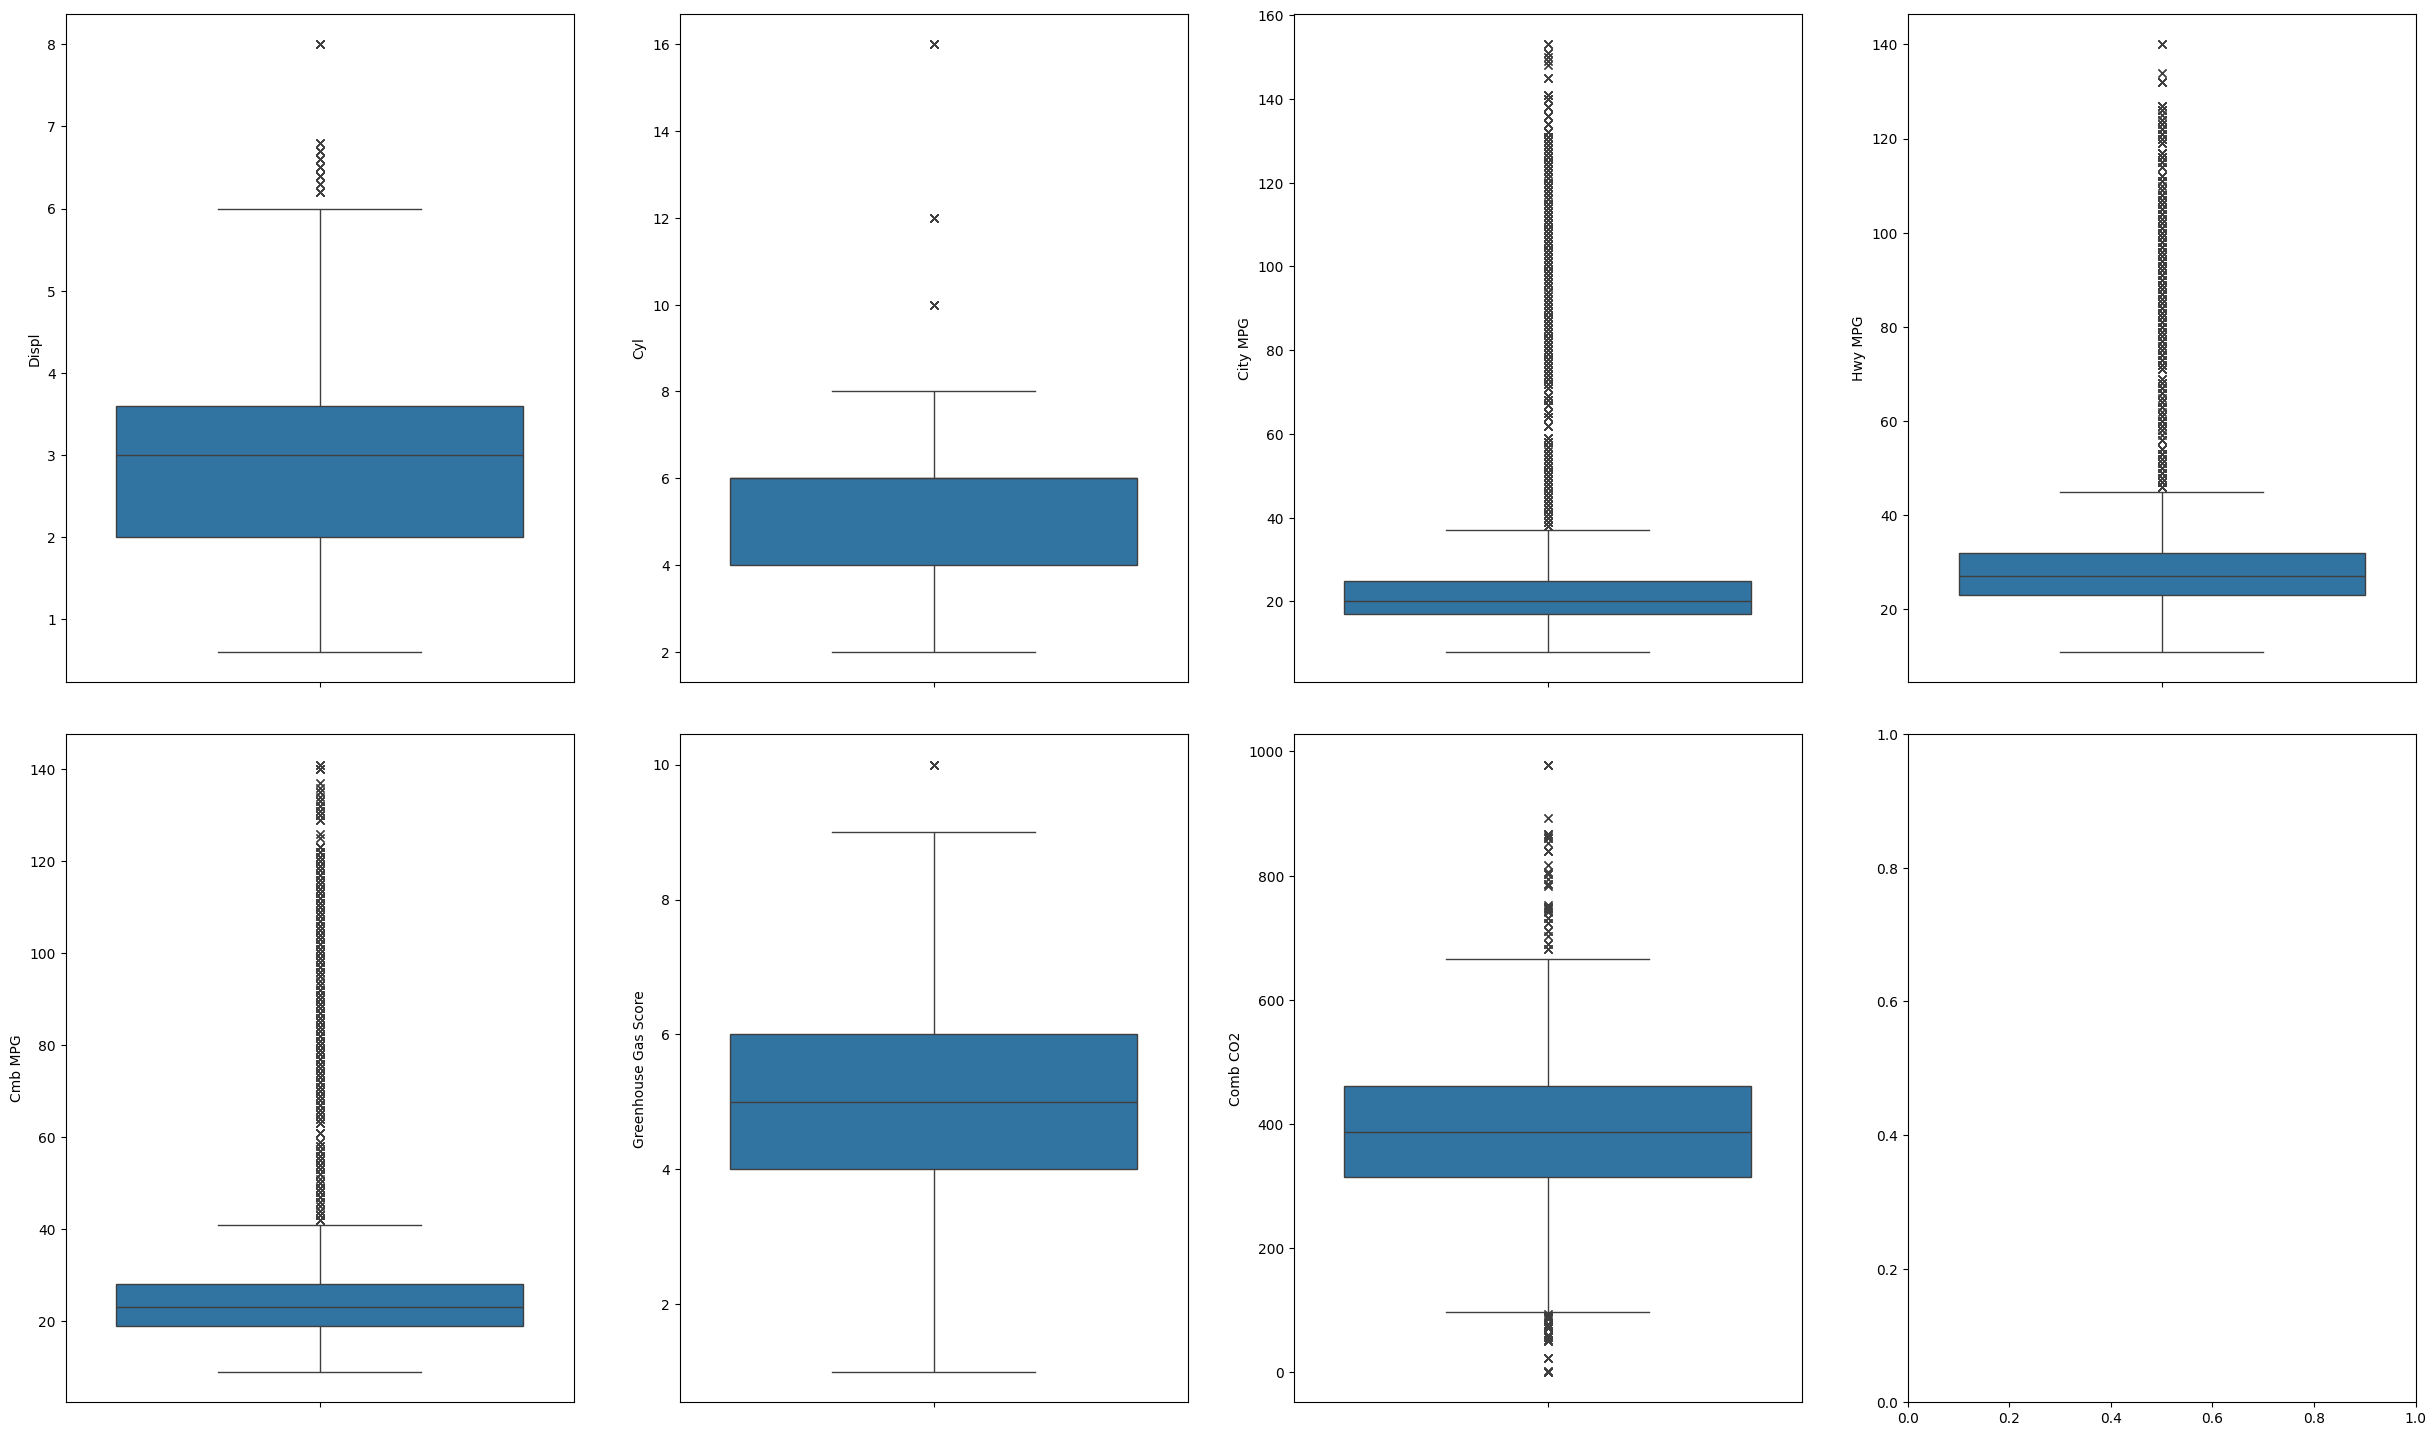

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))


sns.boxplot(df['Displ'], flierprops={"marker": "x"}, ax=axes[0, 0])

sns.boxplot(df['Cyl'], flierprops={"marker": "x"}, ax=axes[0, 1])

sns.boxplot(df['City MPG'], flierprops={"marker": "x"}, ax=axes[0, 2])

sns.boxplot(df['Hwy MPG'], flierprops={"marker": "x"}, ax=axes[0, 3])

sns.boxplot(df['Cmb MPG'], flierprops={"marker": "x"}, ax=axes[1, 0])

sns.boxplot(df['Greenhouse Gas Score'], flierprops={"marker": "x"}, ax=axes[1, 1])

sns.boxplot(df['Comb CO2'], flierprops={"marker": "x"}, ax=axes[1, 2])

plt.tight_layout(pad=3)

plt.show()

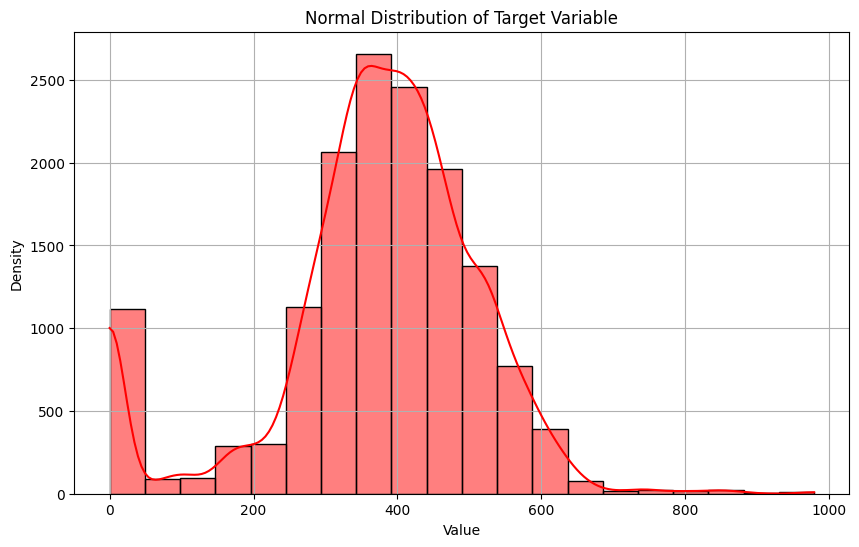

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Comb CO2'], kde=True, color='red', bins=20)
plt.title('Normal Distribution of Target Variable')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()